In [ ]:
## AGENDA
## - Page Rank

In [ ]:
## SET LIBRARY

In [4]:
import os
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
## SET WORK PATH

In [5]:
#work_path = '/home/dmig/work/this-book/neo4j-book'
work_path = '/Users/boO/data8/data.student/neo4j-book/neo4j-book'
os.chdir(work_path)

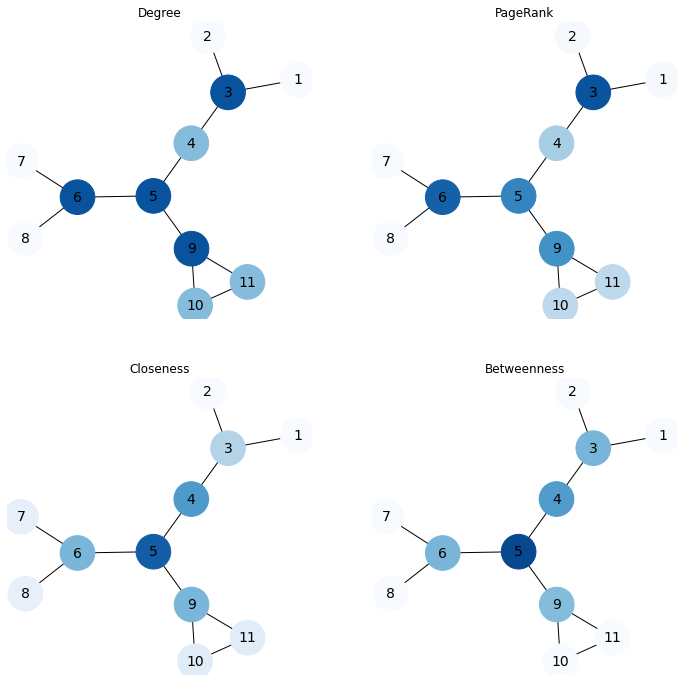

In [11]:
G = nx.read_edgelist("{}/data/test_graph.edgelist".format(work_path))
pos = nx.kamada_kawai_layout(G)


algos = {
    "Degree": nx.degree_centrality,
    "PageRank": nx.pagerank,
    "Closeness": nx.closeness_centrality,
    "Betweenness": nx.betweenness_centrality,
}

f, axs = plt.subplots(2, 2, figsize=(12, 12))

for k, (name, func) in enumerate(algos.items()):

    res = func(G)
    # print(name, res)
    res_nodes = list(res.keys())
    res_values = list(res.values())

    ax = axs.flatten()[k]

    plt_nodes = nx.draw_networkx_nodes(
        G, pos,
        ax=ax,
        nodelist=res_nodes,
        node_color=res_values,
        alpha=1,
        node_size=1200,
        cmap=plt.cm.Blues,
        vmax=max(res_values)*1.1
    )
    ax.set_title(name)
    ax.axis("off")
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=14, ax=ax)
    # cbar = plt.colorbar(plt_nodes, ticks=[min(res_values),
    #                     max(res_values)*1.1])
    # cbar.ax.set_yticklabels(['Low', 'High'])

f.savefig("{}/output/graph_centralities.png".format(work_path))